# Can Social Media make you depressed?

Your choice of social media, or rather the Social media developer's choice of a reccomender system, might be affecting your mental health.

### Reccomender Systems

Reccomender systems are algorithms used to suggest new profiles for you to befriend/follow/connect with on social media. 
<br>
They work on the basic principle of:
<br>
<br>
**We like to hang out with people similar to us**
<br>
<br>
### Mental Health
But when applied to mental health, we attract and get attracted to the people with mental health similar to us? If this were true, that would mean we might have a hard time improving our mental health. As the people we hang out with leave an impression on us. After all, 
<br>
<br>
***You are the average of the people you hang out with***
<br>
<br>

## Study Goals

This study aims to find if this is true or not. We are going to study the **impact of AI driven social media on our mental health**. 
<br>
We will do this by modelling it as a multi-agent graph simulation.

### Hypothesis

Hanging out with depressed people makes you depressed. And hanging out with happy people makes you happy.
<br>
Hence, reccomender systems that are inherently learning about your mental health and suggesting similar friends and content to you might put you in an unbreakable cycle if your mentla health is bad

## Problem Formulation

we represent people with graph nodes. 

We use the Networkx library for modellign our graph: https://networkx.org/

<br>
Each person has a happines score **h** which suggest how happy they are currently on a linear scale of 0 to 1. 
<br>
Each node is labelled as one of: {happy, neutral, sad} depending on their score.

In [1]:
import networkx as nx

In [2]:
G = nx.DiGraph()

We create 100 nodes(people) where each of their happiness index is drawn from the normal distribution:
N(0.5, 0.1)

and they are assignned a happy/neutral/sad label based on:
<br>
0< h < 1/3 -> sad
<br>
1/3 < h 2/3 -> neutral
<br>
2/3 < h < 1 -> Happy

for the normal distribution, we use **Numpy**

In [3]:
import numpy as np

In [4]:
for i in range(100):
    h = np.random.normal(0.5,0.2)
    if h<0.33:
        label = 'depressed'
    elif 0.33<=h<0.66:
        label = 'neutral'
    else:
        label = 'happy'
    print(f"adding node {i} with h={h}, label={label}")
    G.add_node(i, label=label, h=h)

adding node 0 with h=0.5838846024651791, label=neutral
adding node 1 with h=0.5710774277803263, label=neutral
adding node 2 with h=0.39516210615025965, label=neutral
adding node 3 with h=0.33590824032285016, label=neutral
adding node 4 with h=0.44644510964291656, label=neutral
adding node 5 with h=0.3163653649965156, label=depressed
adding node 6 with h=0.7825628140839607, label=happy
adding node 7 with h=0.47460862420594097, label=neutral
adding node 8 with h=0.26467288814142276, label=depressed
adding node 9 with h=0.36190071619948794, label=neutral
adding node 10 with h=0.6185357880196429, label=neutral
adding node 11 with h=0.9009952801431115, label=happy
adding node 12 with h=0.5344775126545612, label=neutral
adding node 13 with h=0.6805314541546832, label=happy
adding node 14 with h=0.348860029840622, label=neutral
adding node 15 with h=0.29580032120394284, label=depressed
adding node 16 with h=0.3017254302212671, label=depressed
adding node 17 with h=0.44182363790414986, label=n

we now visualise our network

In [5]:
import matplotlib.pyplot as plt

In [6]:
color_map = {'depressed':'red', 'neutral':'green', 'happy':'blue'}
colors = []
for i in range(100):
    color = color_map[G.nodes[i]['label']]
    colors.append(color)


we now look at our nodes
with happy people being blue, neutral ones being green and sad ones being red

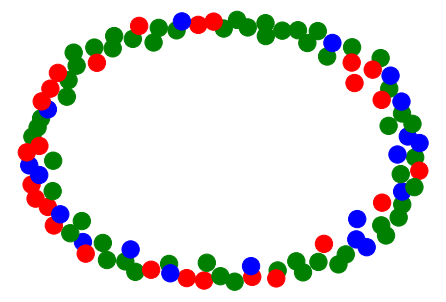

In [7]:
nx.draw(G, node_color=colors, pos=nx.spring_layout(G))

the ditribution of happy, eutral and sad people is:

<BarContainer object of 3 artists>

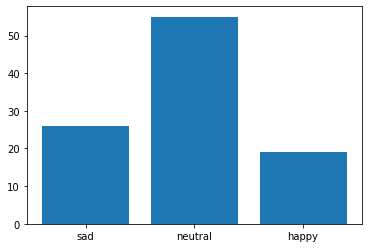

In [8]:
x=['sad','neutral','happy']
sad, neutral,happy = 0,0,0
for i in range(100):
    if G.nodes[i]['label']=='depressed':
        sad+=1
    elif G.nodes[i]['label']=='neutral':
        neutral+=1
    else:
        happy+=1
y=[sad,neutral,happy]
plt.bar(x,y)

We initially start with each person having 2 friends, randomly chosen from the group

In [9]:
from numpy import random

In [10]:
for i in range(100):
    for j in range(2):
        friend = random.randint(0,29)
        while friend == i:
           friend = random.randint(0,29) 
        G.add_edge(i,friend)

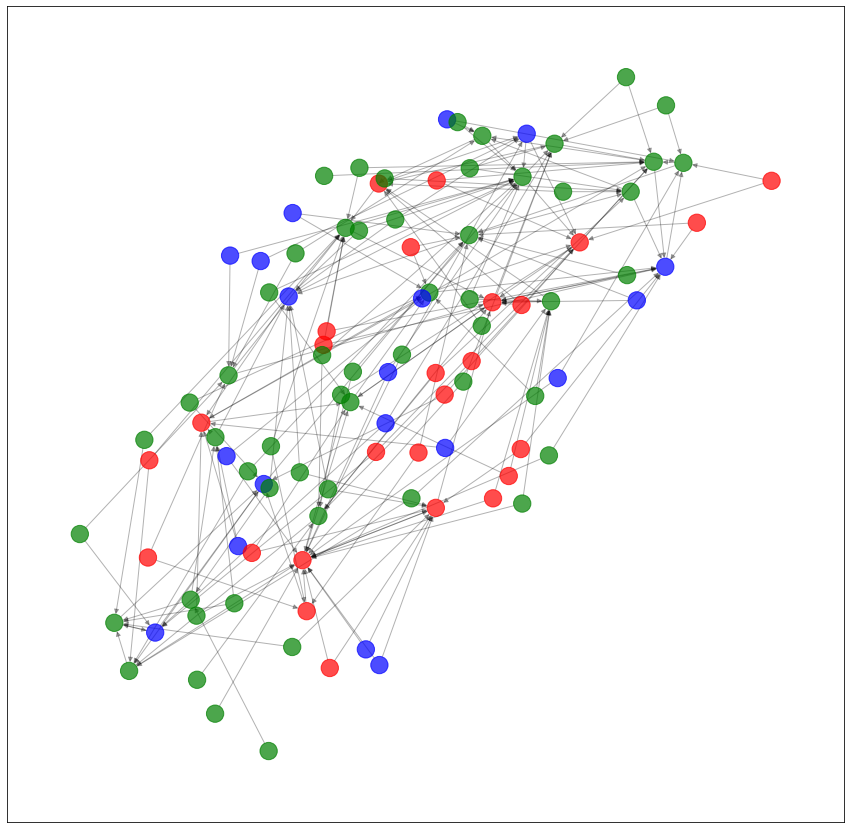

In [11]:
fig, ax = plt.subplots(figsize=(15,15))
layout = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=layout, alpha=0.7,ax=ax, node_color=colors)
nx.draw_networkx_edges(G, pos=layout,  alpha=0.3, ax=ax,arrows=True)
plt.show()

## New friends and Impressions

### New friends
In each iteration, each node makes a new connection.
<br>
Since it is more likely to get reccomended similar people, the probability of making a friend from a certain class is as follows

Class labels:
<br>
sad - S
<br>
neutral - N
<br>
happy - H
<br>
<br>
let P(X|Y) be the probability of you befriending a node from class X given you are from class Y
<br>
<br>
Assume thatt S is x% more likely to befriend S than N. and x% more likely to befreiend N than H. this follows form our ismilarity asusmption
<br>
Let P(H|S) be the probabilioty of sad befirending happy
<br>
then P(N|S) = (1 + x/100)P(H|S)
<br>
P(S|S) = (1 + x/100)P(S|S)
<br>
<br>
with the additional contraint: P(S|S) + P(H|S) + P(N|S) = 1


for the neutral case:
<br>
we have same proabbaility for happy and sad and x% more for neutral

In [12]:
def probs(x, label): #return probbilites list in order [same, middle, opposite]
    if label == 'happy':
        y = 1/(1+(1+x/100)+(1+x/100)**2)
        p =  [(1+x/100)**2*y, (1+x/100)*y, y ]
        return random.choice(['happy','neutral','depressed'], p=p)
    elif label == 'sad':
        y = 1/(1+(1+x/100)+(1+x/100)**2)
        p =  [(1+x/100)**2*y, (1+x/100)*y, y ]
        return random.choice(['depressed','neutral','happy'], p=p)
    else:
        y = 1/( 2 + (1+x/100) )
        p = [y, (1+x/100)*y, y]
        return random.choice(['depressed','neutral','happy'], p=p)



### Impressions
In each iteration, a node's current friends all leave an impression on it.
<br>
let s be the impression strength.
<br>
then in each iteration for a node i, for all nodes connected to i
<br>
h = s_1 + s_2 + ... + s_k
<br>
where s_j is the impression from the jth connected node
<br>
impression strength from:
<br>
happy = +s
<br>
netural = 0
<br>
depressed = -s


we now conduct a simulation for 10 runs with x=30% and s=0.02

In [13]:
s=0.02
x=30


In [14]:
def impression(G):
    #create a copy of the graph
    H = G

    #refer to values in H, update in G
    #for each node
    for node in H.nodes:

        #look at it connections in H
        adj = list(H.adj[node])
        #for each connection
        for neighbour in adj:
            neighbour_label = H.nodes[neighbour]['label']
            #if neighbour is happy
            if neighbour_label == 'happy':
                G.nodes[node]['h'] += s
                #increase h of node in G
            #elif connection is netural
            elif neighbour_label == 'neutral':
                pass
                #leave h as is it
            #else:
            else:
                #decrease h  of node in G
                G.nodes[node]['h'] -= s


In [15]:
def new_friends(G): #make 1 new connenction for each node
    #for each node
    for node in G.nodes:
        label = G.nodes[node]['label']
        neighbour_label = probs(x, label)

        neighbour = node

        while neighbour == node or G.nodes[neighbour]['label']!=neighbour_label or node in list(G.adj[node]):
            neighbour = random.choice(G.nodes)
        
        G.add_edge(node, neighbour)
            




In [16]:
def update_label(G): #update the label of each node based on h value
    for node in G.nodes:
        h = G.nodes[node]['h']
        if h<1/3:
            G.nodes[node]['label'] = 'depressed'
        elif h>2/3:
            G.nodes[node]['label'] = 'happy'
        else:
            G.nodes[node]['label'] = 'neutral'


In [17]:
layout = nx.spring_layout(G)

In [18]:
def draw(G,f): #plot and save figure
    color_map = {'depressed':'red', 'neutral':'green', 'happy':'blue'}
    colors = []
    for i in range(100):
        color = color_map[G.nodes[i]['label']]
        colors.append(color)

    fig, ax = plt.subplots(figsize=(15,15))

    
    nx.draw_networkx_edges(G, pos=layout,  alpha=0.3, ax=ax,arrows=True)
    nx.draw_networkx_nodes(G, pos=layout, alpha=0.7,ax=ax, node_size=200, node_color=colors)
    
    name = 'figures/graph_'+str(f)+'.png'
    print(name)
    plt.savefig(name)
    plt.show()


    x=['sad','neutral','happy']
    sad, neutral,happy = 0,0,0
    for i in range(100):
        if G.nodes[i]['label']=='depressed':
            sad+=1
        elif G.nodes[i]['label']=='neutral':
            neutral+=1
        else:
            happy+=1
    y=[sad,neutral,happy]
    fig2,ax2 = plt.subplots()
    ax2.set_ylim([0,100])
    ax2.bar(x,y)
    name = 'figures/dist_'+str(f)+'.png'
    print(name)
    plt.savefig(name)

    
    

run 0
figures/graph_0.png


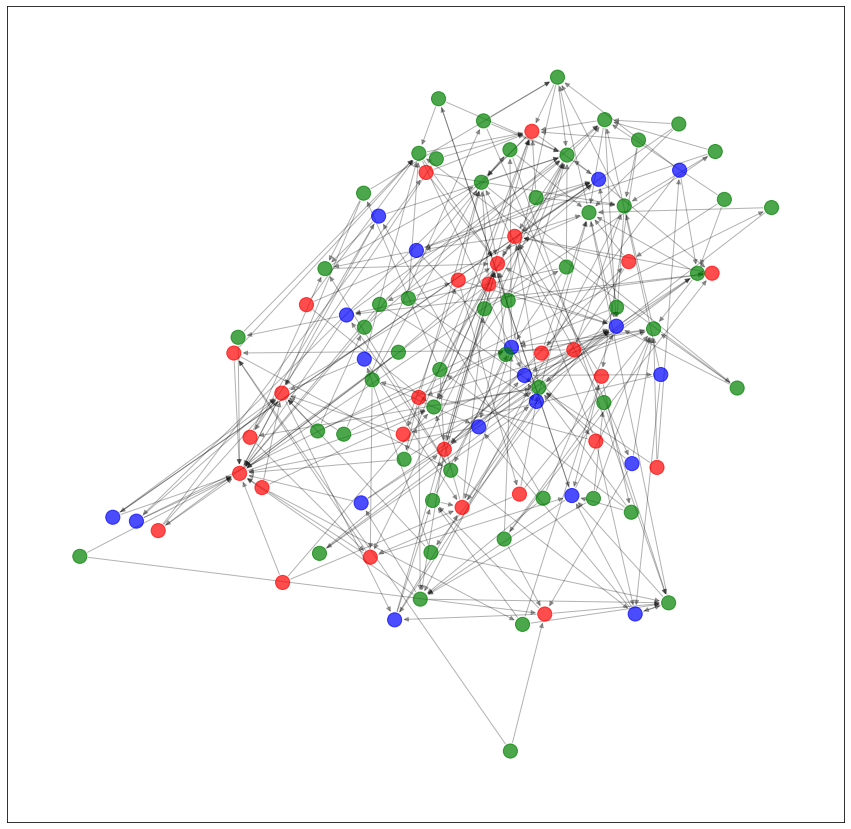

figures/dist_0.png
run 1
figures/graph_1.png


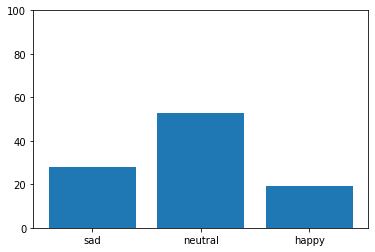

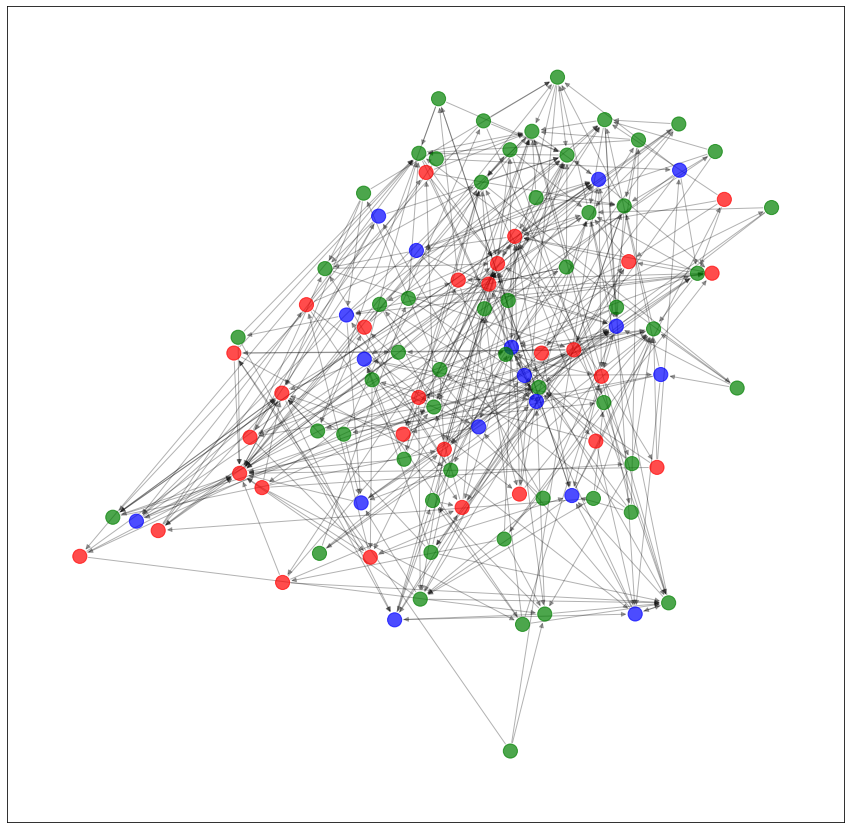

figures/dist_1.png
run 2
figures/graph_2.png


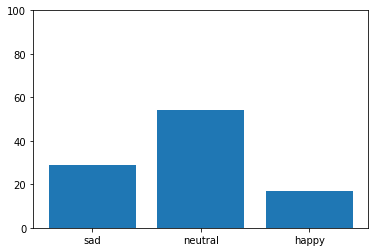

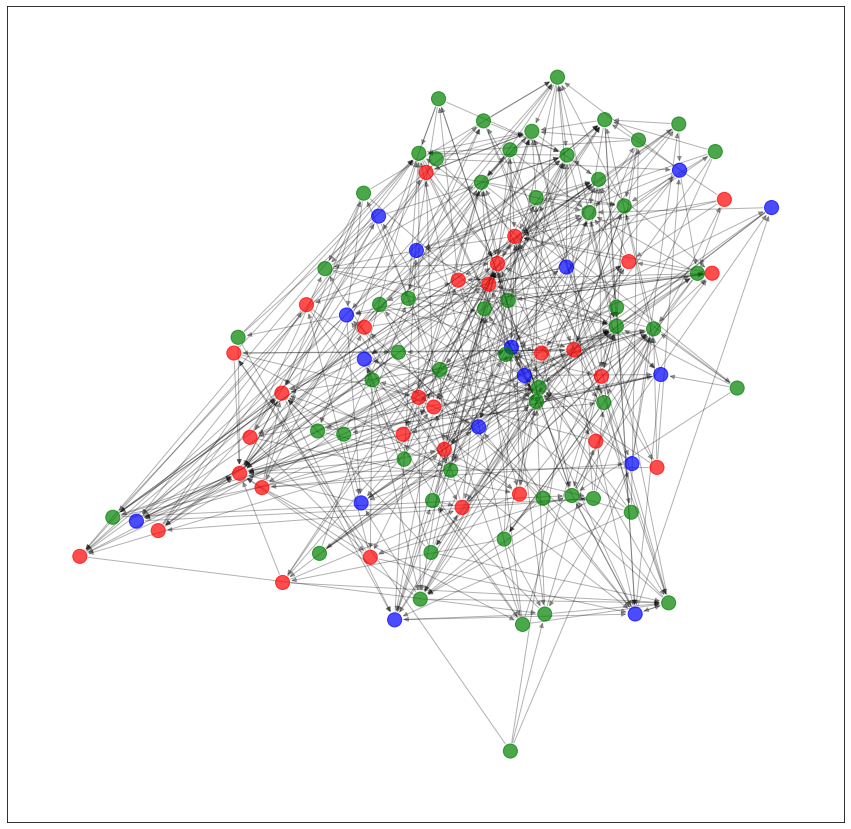

figures/dist_2.png
run 3
figures/graph_3.png


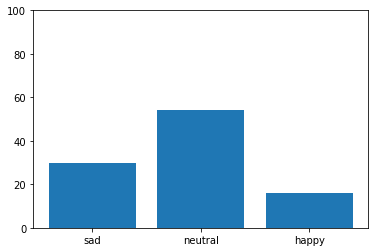

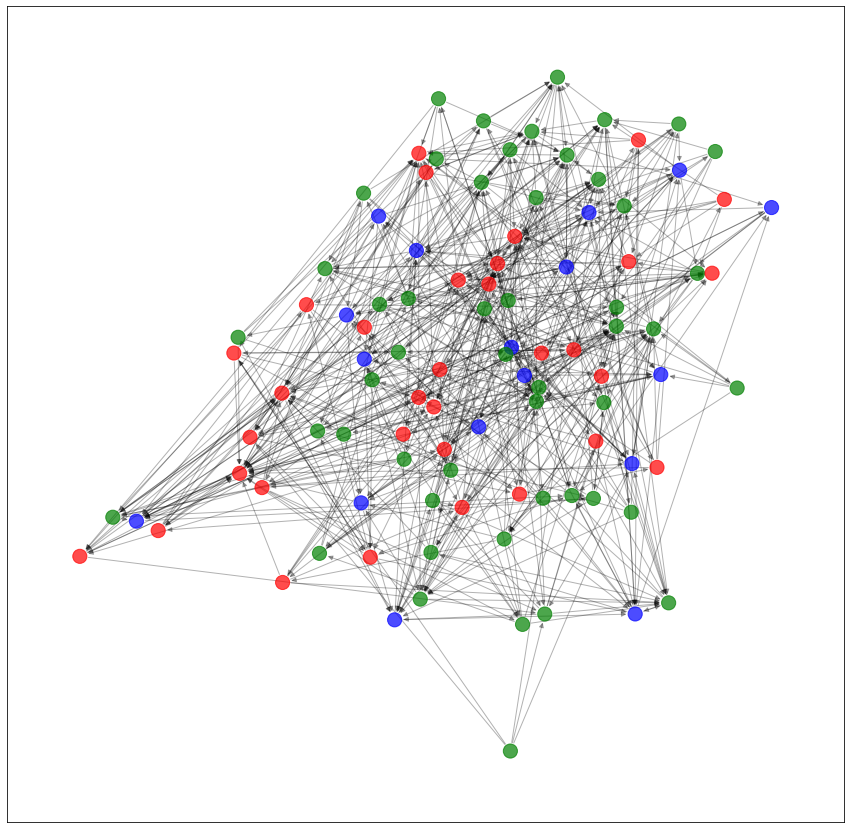

figures/dist_3.png
run 4
figures/graph_4.png


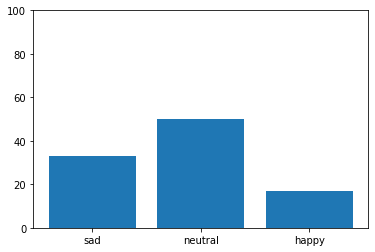

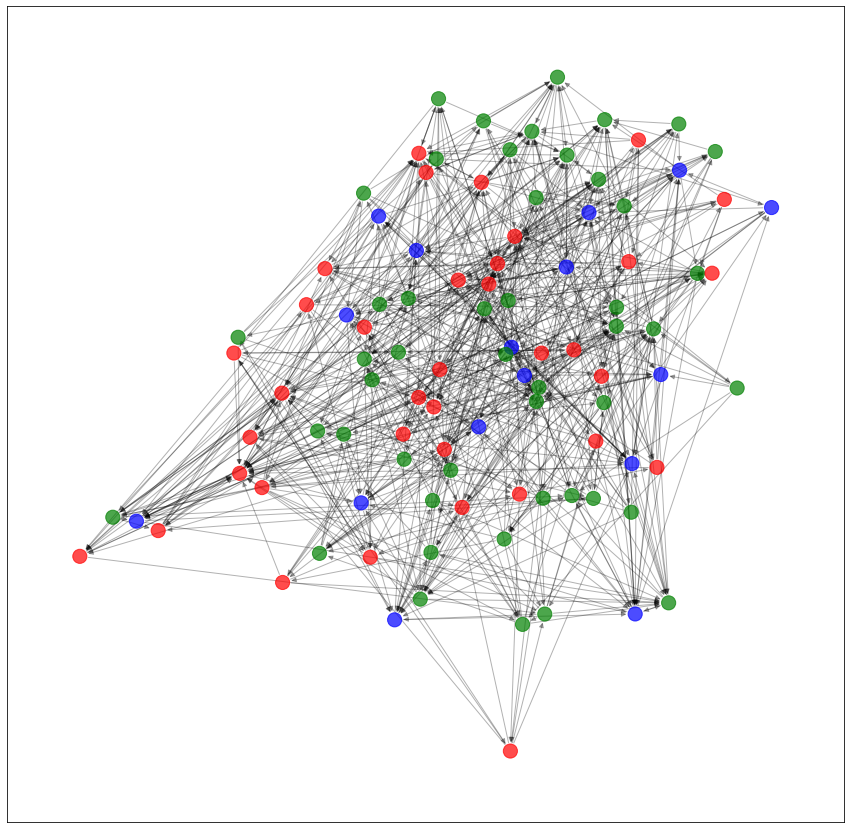

figures/dist_4.png
run 5
figures/graph_5.png


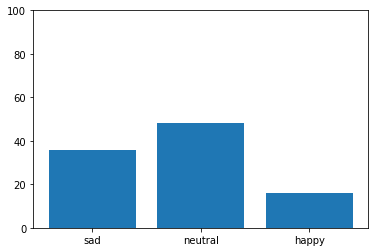

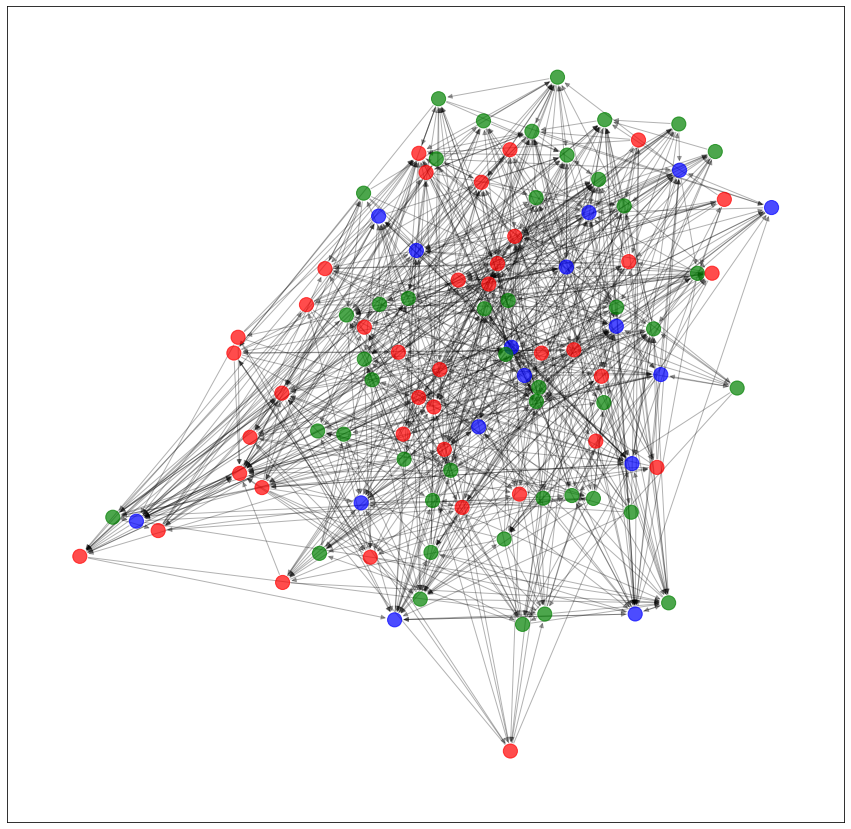

figures/dist_5.png
run 6
figures/graph_6.png


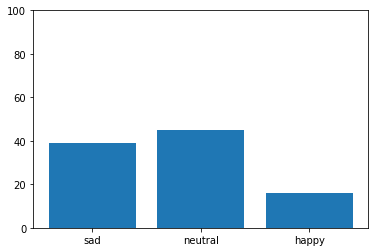

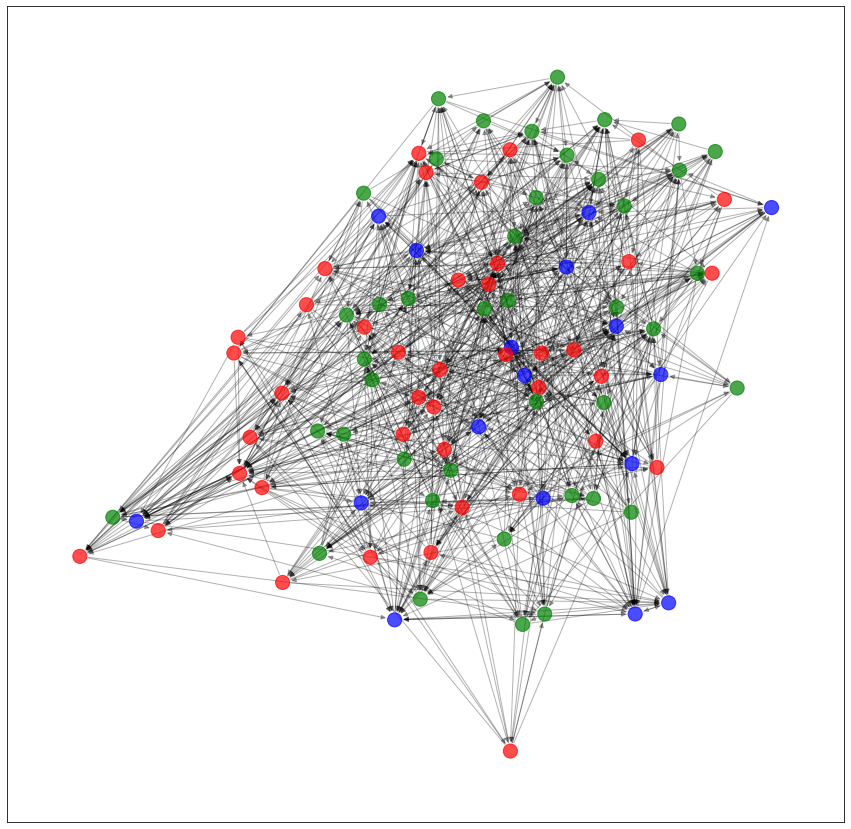

figures/dist_6.png
run 7
figures/graph_7.png


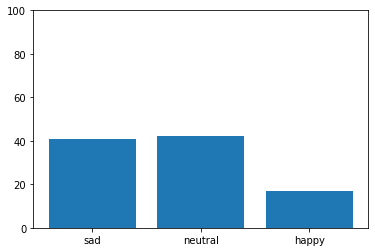

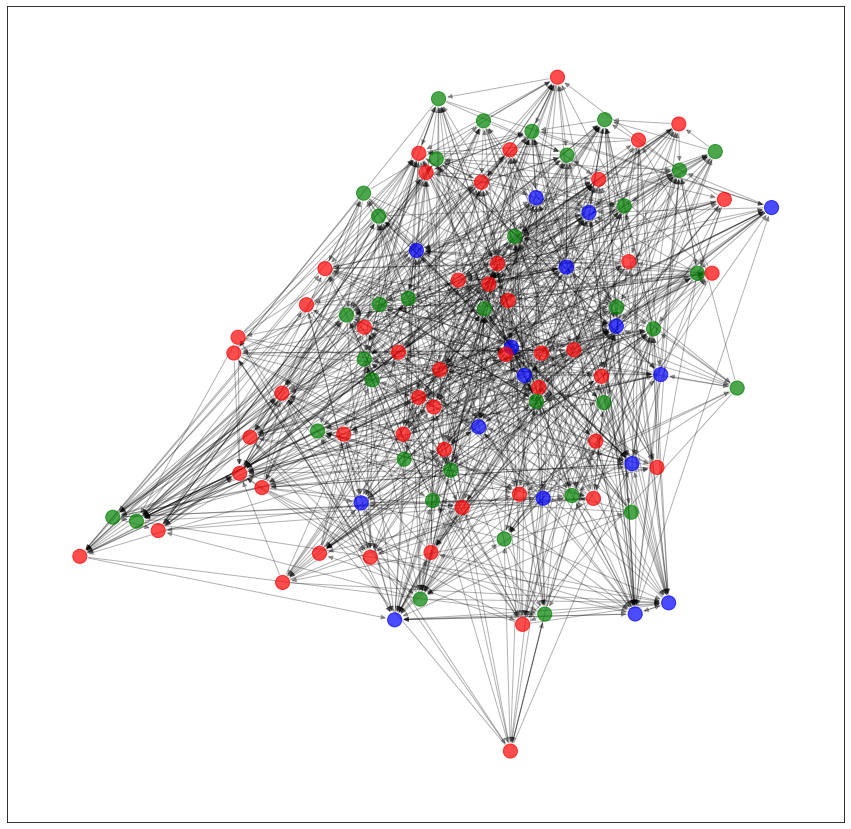

figures/dist_7.png
run 8
figures/graph_8.png


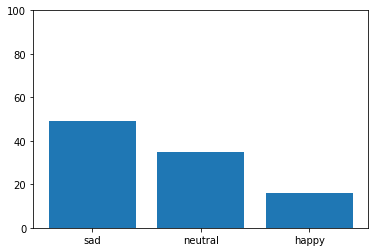

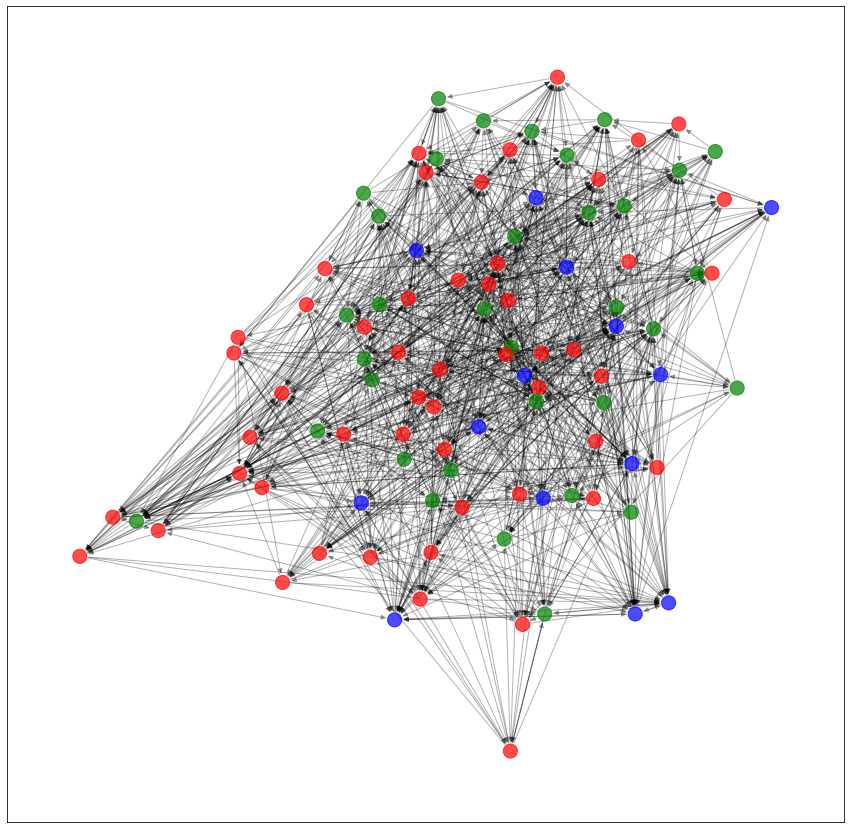

figures/dist_8.png
run 9
figures/graph_9.png


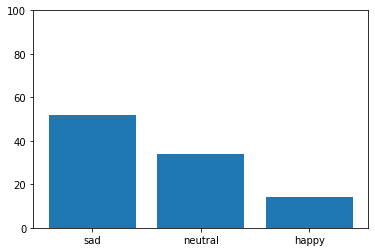

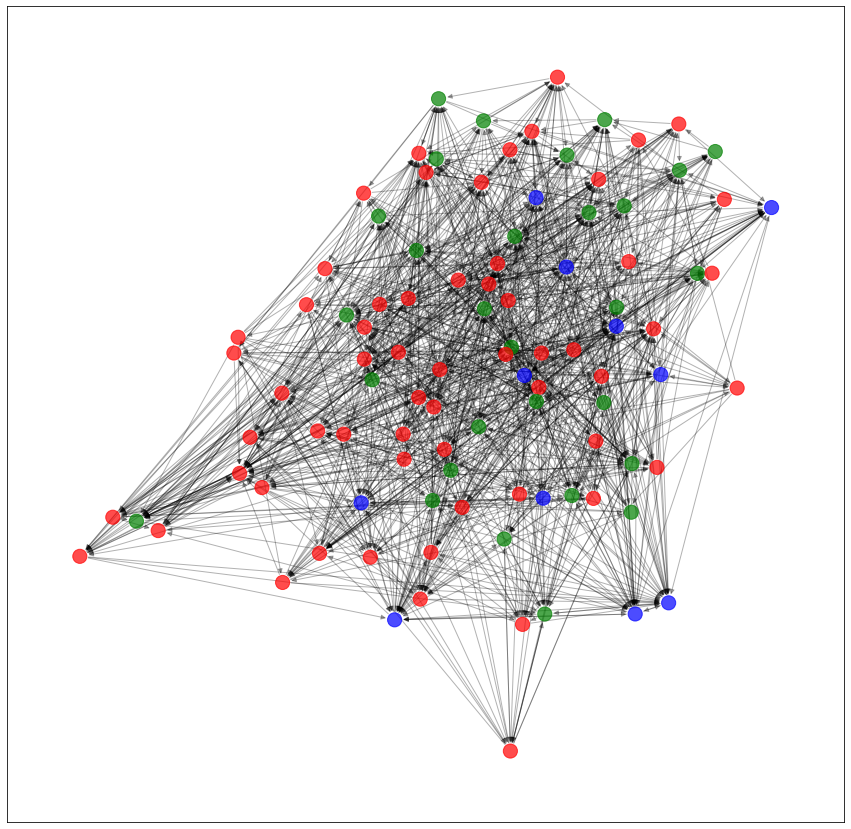

figures/dist_9.png


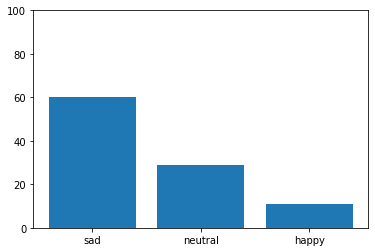

In [19]:
for f in range(10):
    print("run",f)
    impression(G)
    new_friends(G)
    update_label(G)
    draw(G,f)
    


![SegmentLocal](animated.gif "segment")

![SegmentLocal](dist_animation.gif "segment")

## as you can see, the number of neutral and happy people decreased and the number of sad/depressed people increased.

<br>
While this is sensitivfe to inital conditions, on almost all runs, the neutral group gets smaller and the crowd tends to polarise, which might be hurtful for our society!

so even if you are neutral but on the sadder side, social emdia reccoemdner systems could make you quite sad

This result bring out the reality of modern social media and how it is fuelling greater levels of depression among teh youth

# Choose your social media and how much you want to engage wisely.